In [55]:
import tensorflow as tf
# from keras.applications.resnet50 import ResNet50
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50

In [56]:
resNet50_model = ResNet50()
resNet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [57]:
for layer in resNet50_model.layers:
  if '_conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv1_conv (7, 7, 3, 64)
conv2_block1_1_conv (1, 1, 64, 64)
conv2_block1_2_conv (3, 3, 64, 64)
conv2_block1_0_conv (1, 1, 64, 256)
conv2_block1_3_conv (1, 1, 64, 256)
conv2_block2_1_conv (1, 1, 256, 64)
conv2_block2_2_conv (3, 3, 64, 64)
conv2_block2_3_conv (1, 1, 64, 256)
conv2_block3_1_conv (1, 1, 256, 64)
conv2_block3_2_conv (3, 3, 64, 64)
conv2_block3_3_conv (1, 1, 64, 256)
conv3_block1_1_conv (1, 1, 256, 128)
conv3_block1_2_conv (3, 3, 128, 128)
conv3_block1_0_conv (1, 1, 256, 512)
conv3_block1_3_conv (1, 1, 128, 512)
conv3_block2_1_conv (1, 1, 512, 128)
conv3_block2_2_conv (3, 3, 128, 128)
conv3_block2_3_conv (1, 1, 128, 512)
conv3_block3_1_conv (1, 1, 512, 128)
conv3_block3_2_conv (3, 3, 128, 128)
conv3_block3_3_conv (1, 1, 128, 512)
conv3_block4_1_conv (1, 1, 512, 128)
conv3_block4_2_conv (3, 3, 128, 128)
conv3_block4_3_conv (1, 1, 128, 512)
conv4_block1_1_conv (1, 1, 512, 256)
conv4_block1_2_conv (3, 3, 256, 256)
conv4_block1_0_conv (1, 1, 512, 1024)
conv4_block1_3_conv (1, 1,

In [58]:
# retrieve weights from the second hidden layer
filters, biases = resNet50_model.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them - MinMax Normalization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

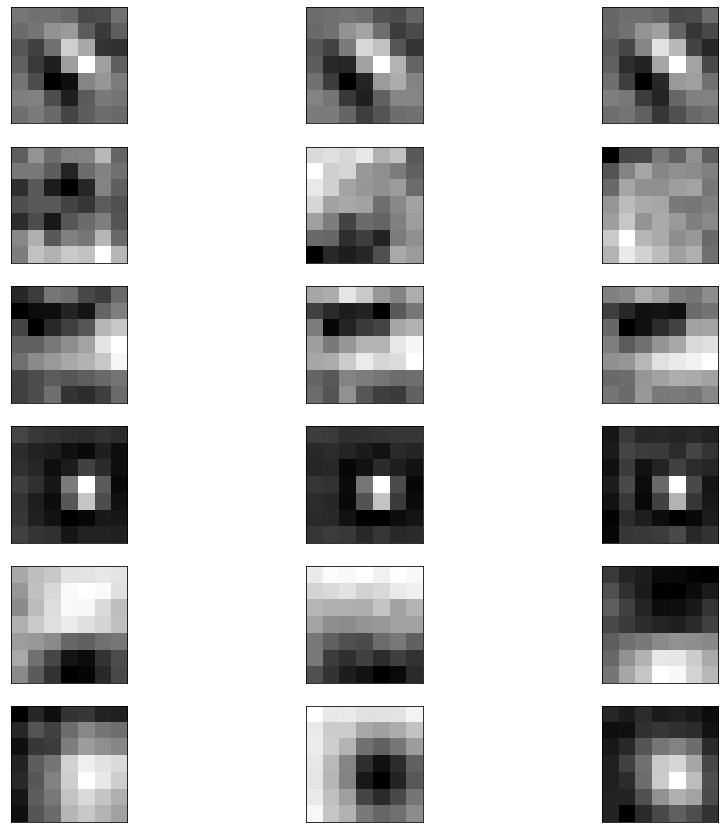

In [59]:
n_filters, ix = 6, 1
plt.figure(figsize=(15,15))
for i in range(n_filters):
	f = filters[:, :, :, i]
	for j in range(3):
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1

# Visualize Feature Maps

In [60]:
for i in range(len(resNet50_model.layers)):
	layer = resNet50_model.layers[i]
	if 'conv' not in layer.name:
		continue
	print(i, layer.name, layer.output.shape)

1 conv1_pad (None, 230, 230, 3)
2 conv1_conv (None, 112, 112, 64)
3 conv1_bn (None, 112, 112, 64)
4 conv1_relu (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
8 conv2_block1_1_bn (None, 56, 56, 64)
9 conv2_block1_1_relu (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
11 conv2_block1_2_bn (None, 56, 56, 64)
12 conv2_block1_2_relu (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
15 conv2_block1_0_bn (None, 56, 56, 256)
16 conv2_block1_3_bn (None, 56, 56, 256)
17 conv2_block1_add (None, 56, 56, 256)
18 conv2_block1_out (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
20 conv2_block2_1_bn (None, 56, 56, 64)
21 conv2_block2_1_relu (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
23 conv2_block2_2_bn (None, 56, 56, 64)
24 conv2_block2_2_relu (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
26 conv2_block2_3_bn (None, 56, 56, 256)
27 conv2_block2_add (None, 56, 56, 256)
28 

In [61]:
# redefine model to output right after the first hidden layer
model = tf.keras.Model(inputs=resNet50_model.inputs, outputs=resNet50_model.layers[1].output)

In [62]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [63]:
# load the image with the required shape
img = cv2.imread('/content/BeePic.jpg')
img = cv2.resize(img, (224,224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 223.5, 223.5, -0.5)

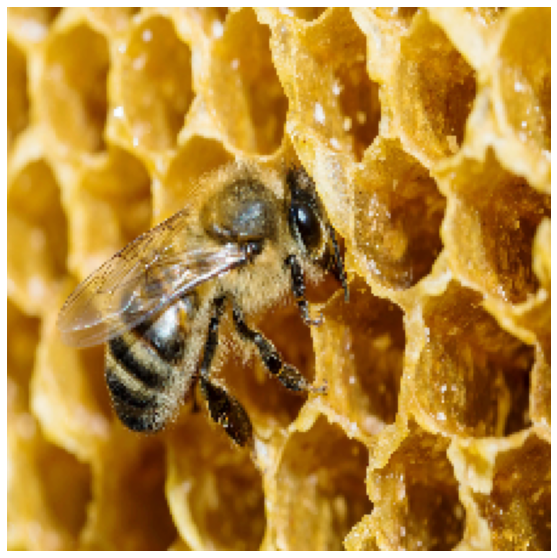

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

In [65]:
img = np.expand_dims(img, axis=0)

In [66]:
img.shape

(1, 224, 224, 3)

In [67]:
img = tf.keras.applications.vgg16.preprocess_input(img)

In [68]:
feature_maps = model.predict(img)

In [69]:
feature_maps.shape

(1, 230, 230, 3)

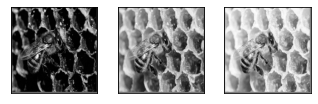

In [75]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(15,15))
for _ in range(3):
	ax = plt.subplot(square, square, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
	ix += 1

# Feature Map visualization for each block 

In [77]:
ixs = [3, 6, 10, 14, 18]
outputs = [resNet50_model.layers[i].output for i in ixs]

In [78]:
outputs

[<KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_bn')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'pool1_pool')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_2_conv')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'conv2_block1_3_conv')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'conv2_block1_out')>]

In [79]:
mult_out_model = tf.keras.Model(inputs=resNet50_model.inputs, outputs=outputs)       # mult_out_model stands for 'multiple output model' :)

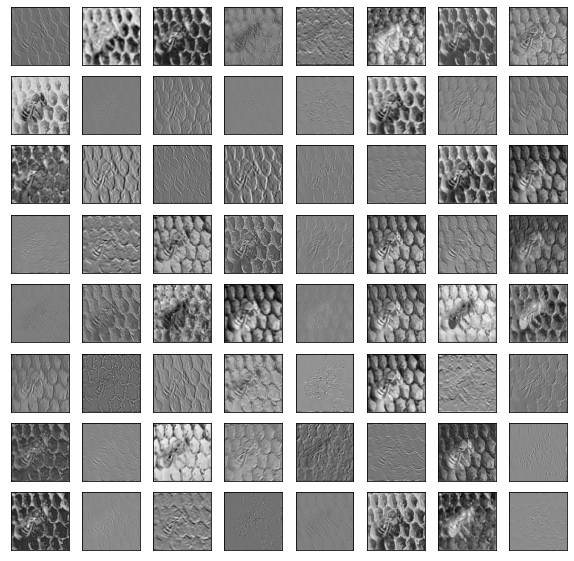

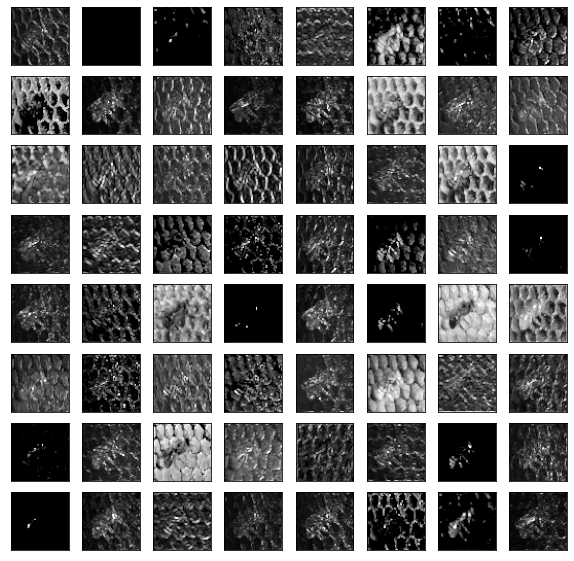

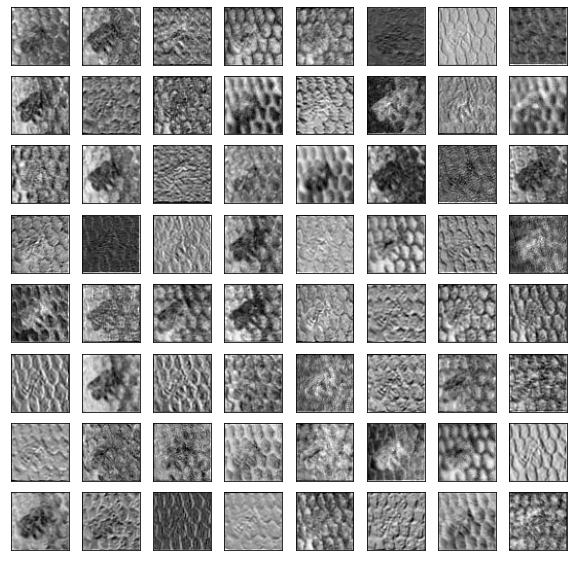

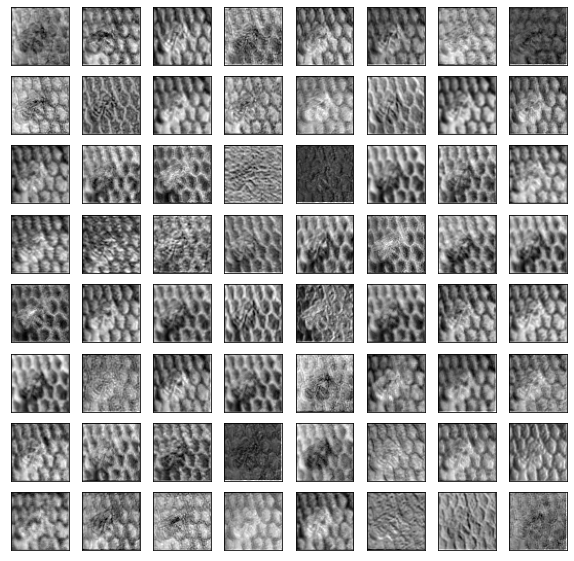

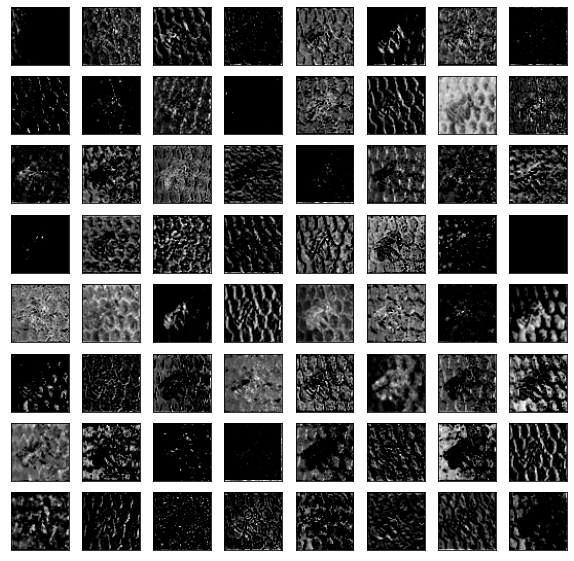

In [80]:
feature_maps = mult_out_model.predict(img)
# plot the output from each block
square = 8

for fmap in feature_maps:
	plt.figure(figsize=(10,10))
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()